A function like F = 1.8C + 32 can be defined by a set of points that are then fitted to a function. In this case the relationship between Celsius and Fahrenheit is linear. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Plot the line F = 1.8C + 32.

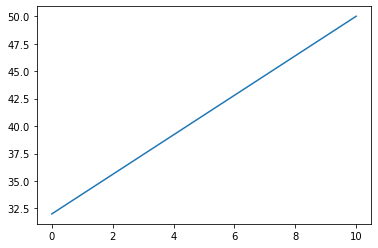

In [2]:
fig = plt.figure()
ax = plt.axes()
C = np.linspace(0, 10, 1000)
ax.plot(C, 1.8*C+32)

The x-axis is the points generated by np.linspace(), and the y-axis is the mapping of C to F. Like np.linspace, tf.linspace generates evenly-spaced points along one axis over a specified interval. With ax.plot, we plot the points on the x-axis against the function 1.8x + 32. 

### Original function

Map a sine function using linspace.

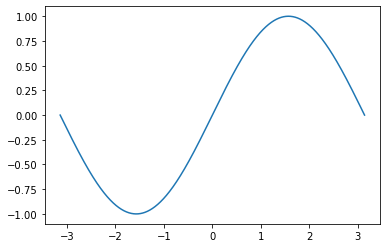

In [3]:
import tensorflow as tf
import math

x = tf.linspace(-math.pi, math.pi, 2000)
y = tf.sin(x)
plt.plot(x, y)
plt.show()

We want to use a third-degree polynomial to approximate a sine function. The coefficients of the polynomial are the **weights** of the network we will construct. 

y = a + bx + cx^2 + dx^ 3

### Randomly initialize weights
Initially the four weights we choose for our polynomial approximator are random and completely unconnected to the sine function. 

In [4]:
a = tf.random.uniform(shape=[]) 
b = tf.random.uniform(shape=[])
c = tf.random.uniform(shape=[])
d = tf.random.uniform(shape=[])

Calculating the first predicted value is the forward pass. We then calculate the loss using a metric we choose, such as sum of squared errors. We carry out gradient descent to calculate how much to adjust the weights. 

We calculate the sum of squared errors loss by taking the square of the difference between the predicted value and the actual value for each prediction and summing all these errors together. 

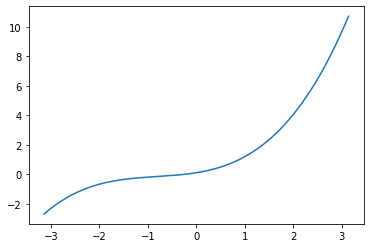

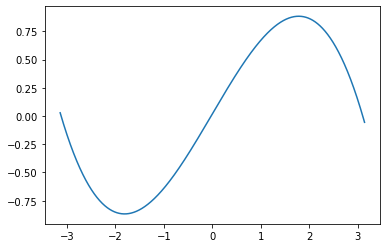

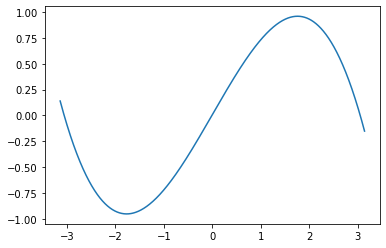

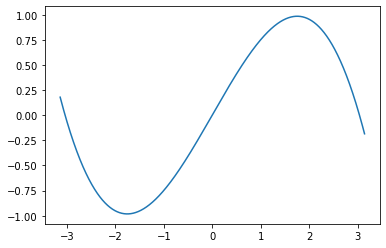

Result: y = 0.0014299112372100353 + 0.8510683178901672 x + -0.0002466853184159845 x^2 + -0.09252352267503738 x^3


In [5]:
learning_rate = 1e-6

for i in range(2000):
    y_pred = a + b*x + c*x**2 + d*x**3 #forward pass
    loss = tf.pow(y_pred - y, 2)
    loss = tf.reduce_sum(loss).numpy() #sum of squared errors
    grad_y_pred = 2.0 * (y_pred - y) 
    
    if i % 500 == 0:
        plt.plot(x, y_pred)
        plt.show()

    grad_a = tf.reduce_sum(grad_y_pred) #gradient descent
    grad_b = tf.reduce_sum(grad_y_pred * x)
    grad_c = tf.reduce_sum(grad_y_pred * x**2)
    grad_d = tf.reduce_sum(grad_y_pred * x**3)
    
    a -= grad_a * learning_rate #update weights
    b -= grad_b * learning_rate
    c -= grad_c * learning_rate
    d -= grad_d * learning_rate

print(f'Result: y = {a.numpy()} + {b.numpy()} x + {c.numpy()} x^2 + {d.numpy()} x^3')

We now have four weights that can be used in the polynomial to approximate the sine function.

a = 0.012
b = 0.847
c = -0.002
d = -0.092

We update the weights each training cycle using the learning rate, which we determine ahead of time.